## **Predicting Employee Exit**

We will be working on Employee Data. This is employee attrition data. The 'left' named column represents exit from the company or not.

The data consists of categorical & number data. Thus, needs data preprocessing. Make use of preprocessing techniques that you have learnt & build model to predict 'left' named column



Dataset Link https://github.com/tranghth-lux/data-science-complete-tutorial/blob/master/Data/HR_comma_sep.csv.txt

In [121]:
import pandas as pd
import numpy as np

In [122]:
df = pd.read_csv('https://raw.githubusercontent.com/tranghth-lux/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [123]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [125]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [126]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [127]:
df = pd.get_dummies(df, columns=['sales', 'salary'])

In [128]:
df.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
9115,0.99,0.64,3,183,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [129]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [130]:
scaler = MinMaxScaler()

df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']] = scaler.fit_transform(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])


In [131]:
X = df.drop('left', axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [133]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [134]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.988
Confusion Matrix:
 [[2284   10]
 [  26  680]]


## **Estimate the total compensation to be provided to an employee**

In [135]:
import pandas as pd
import numpy as np

In [136]:
df2 = pd.read_csv('/content/train_set_employee.csv')

In [137]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [138]:
df2.isnull().sum().sort_values(ascending=False).head()

JF       38
Union    36
Year      0
OGC       0
OG        0
dtype: int64

In [139]:
df2.columns

Index(['Year', 'OGC', 'OG', 'DC', 'Dept', 'UC', 'Union', 'JF', 'Job', 'EI',
       'Salaries', 'Overtime', 'H/D', 'YT', 'Total_Compensation'],
      dtype='object')

In [140]:
df2 = df2.drop(['EI'], axis=1)

In [141]:
df2 = pd.get_dummies(df2, columns=['OGC', 'DC', 'UC', 'JF', 'Job'])


In [142]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [143]:
df2[['Salaries', 'Overtime', 'H/D', 'Total_Compensation']] = imputer.fit_transform(df2[['Salaries', 'Overtime', 'H/D', 'Total_Compensation']])

In [144]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
scaler = MinMaxScaler()

In [146]:
df2[['Salaries', 'Overtime', 'H/D', 'Total_Compensation']] = scaler.fit_transform(df2[['Salaries', 'Overtime', 'H/D', 'Total_Compensation']])

In [147]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

In [148]:
X = df2.drop('Total_Compensation', axis=1)

y = df2['Total_Compensation']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [150]:
model.fit(X_train, y_train)

In [151]:
y_pred = model.predict(X_test)

In [152]:
from sklearn.metrics import r2_score, mean_squared_error


print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

## **Obesity Trends**

In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [154]:
df3 = pd.read_csv("/content/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv")

In [155]:
df3.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [156]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [157]:
df3.shape

(53392, 33)

In [158]:
df3.isnull().sum().sort_values(ascending=False).head(30)

Data_Value_Unit               53392
Total                         51485
Gender                        49578
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Education                     45764
Age(years)                    41954
Income                        40043
Race/Ethnicity                38136
High_Confidence_Limit          5046
Low_Confidence_Limit           5046
Sample_Size                    5046
Data_Value                     5046
Data_Value_Alt                 5046
GeoLocation                    1008
TopicID                           0
QuestionID                        0
ClassID                           0
DataValueTypeID                   0
LocationID                        0
StratificationCategory1           0
Stratification1                   0
StratificationCategoryId1         0
YearStart                         0
YearEnd                           0
Data_Value_Type                   0
Question                          0
Topic                       

In [159]:
df3.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [160]:
df3.drop(['YearEnd', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
        'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Total', 'Gender', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'], axis = 1, inplace=True)

In [161]:
df3.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Age(years),Education,Income,Race/Ethnicity,LocationID
0,2011,AL,Alabama,32.0,7304.0,NaN,NaN,NaN,NaN,1
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,NaN,NaN,1
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,NaN,NaN,1
3,2011,AL,Alabama,33.6,1153.0,NaN,Less than high school,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,NaN,High school graduate,NaN,NaN,1


In [162]:
df3.drop(["Age(years)", "Education"], axis=1, inplace= True)

In [163]:
# df3.duplicated().sum()
df3.drop_duplicates()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,Income,Race/Ethnicity,LocationID
0,2011,AL,Alabama,32.0,7304.0,NaN,NaN,1
1,2011,AL,Alabama,32.3,2581.0,NaN,NaN,1
2,2011,AL,Alabama,31.8,4723.0,NaN,NaN,1
3,2011,AL,Alabama,33.6,1153.0,NaN,NaN,1
4,2011,AL,Alabama,32.8,2402.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...
53382,2016,VI,Virgin Islands,13.3,212.0,"$75,000 or greater",NaN,78
53383,2016,VI,Virgin Islands,25.3,137.0,Data not reported,NaN,78
53384,2016,VI,Virgin Islands,18.3,154.0,NaN,Non-Hispanic White,78
53385,2016,VI,Virgin Islands,24.1,820.0,NaN,Non-Hispanic Black,78


<ipython-input-164-754540c09d81>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), cmap= 'crest')


<Axes: >

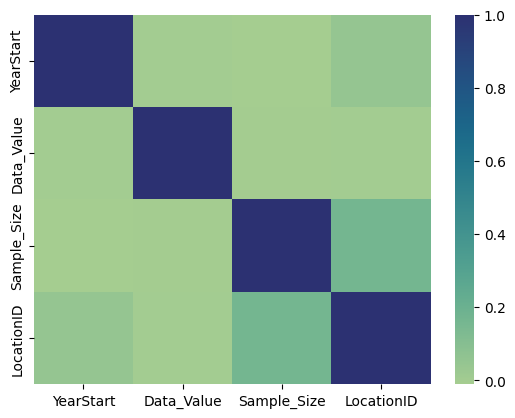

In [164]:
import seaborn as sns
sns.heatmap(df3.corr(), cmap= 'crest')

In [165]:
df3['Sample_Size'] = df3['Sample_Size'].fillna(df3['Sample_Size'].mean())

In [166]:
X = df3[['YearStart', 'LocationID','Sample_Size']]
y = df3['Data_Value']

In [167]:
y = y.fillna(y.mean())

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [169]:
X_train.head()

,YearStart,LocationID,Sample_Size
23832,2011,38,5042.0
42280,2015,33,2681.0
30352,2013,48,2879.0
26509,2011,42,1377.0
8955,2011,17,1057.0


In [170]:
y_train.head()

23832    27.1
42280    65.8
30352    25.4
26509    27.5
8955     51.0
Name: Data_Value, dtype: float64

In [171]:
std_scaler = StandardScaler().fit(X_train) 

X_train_scaled = std_scaler.transform(X_train)

In [172]:
X_test_scaled = std_scaler.transform(X_test)

In [173]:
X_train_const_scaled = sm.add_constant(X_train_scaled) 
model = sm.OLS(y_train, X_train_const_scaled).fit()

predictions_train = model.predict(X_train_const_scaled)
X_test_const_scaled = sm.add_constant(X_test_scaled)

predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()


In [174]:
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Data_Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6334
Date:                Sun, 23 Apr 2023   Prob (F-statistic):              0.593
Time:                        17:28:00   Log-Likelihood:            -1.3807e+05
No. Observations:               37374   AIC:                         2.762e+05
Df Residuals:                   37370   BIC:                         2.762e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1372      0.050    618.492      0.000      31.038      31.236
x1             0.0021      0.050      0.042      0.967      -0.097       0.101
x2            -0.0498      0.051     -0.976      0.329      -0.150       0.050
x3            -0.0412      0.051     -0.809      0.419      -0.141       0.059
==============================================================================
Omnibus:                     1745.361   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2283.897
Skew:                           0.473   Prob(JB):                         0.00
Kurtosis:                       3.755   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
predictions_test

array([31.20197622, 31.0922798 , 31.1897966 , ..., 31.1079859 ,
       31.16508477, 31.15828943])

In [176]:
model.rsquared_adj

-2.9428973189471463e-05

In [177]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [178]:
model.score(X_test_scaled,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-0.06307819010043447

In [179]:
model.coef_

array([ 1.23804971e-03, -2.96602659e-03, -2.13467180e-06])

In [180]:
model.intercept_

28.742735051622503

In [182]:
y_pred=model.predict(X_test_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [183]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [184]:
result

,y_test,y_pred
5906,32.300000,28.745933
27559,49.100000,28.740099
6394,31.156681,28.745024
14864,34.000000,28.744190
24435,19.500000,28.739521
...,...,...
32762,34.800000,28.737778
36962,31.900000,28.743154
25372,31.156681,28.740807
11026,24.300000,28.742879
